In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio 2
## Graficos de Barras

In [ ]:
data = sns.load_dataset("penguins")
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


1. Crea una tabla agrupada segun `species`, y calcula el minimo de `body_mass_g` para cada una (ignorando valores nulos). Grafica esos valores. Incluye un titulo adecuado.

In [ ]:
species = data.groupby("species")[["body_mass_g"]].min()
species

,body_mass_g
species,
Adelie,2850.0
Chinstrap,2700.0
Gentoo,3950.0


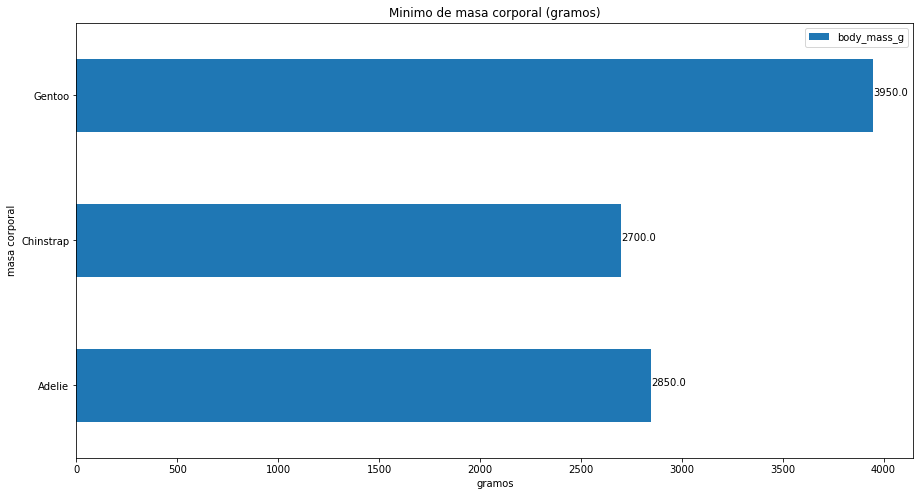

In [ ]:
# plt.bar(species.index, species["body_mass_g"])
species.plot(kind="barh",figsize=(15,8))
for index, value in enumerate(species.body_mass_g):
    plt.text(value, index, str(value))
plt.title("Minimo de masa corporal (gramos)")
plt.xlabel("gramos")
plt.ylabel('masa corporal')
plt.show()

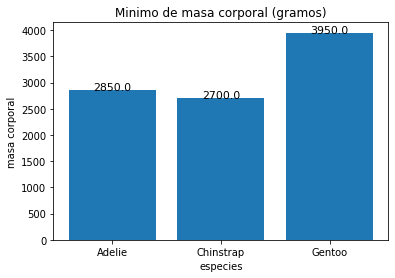

In [ ]:
plt.bar(species.index, species["body_mass_g"])
for index, value in enumerate(species.body_mass_g):
    plt.text(index, value, str(value), ha='center',fontsize=11)
plt.title("Minimo de masa corporal (gramos)")
plt.xlabel("especies")
plt.ylabel('masa corporal')
plt.show()

2. Crea una tabla agrupada segun `island`, y calcula el minimo de `bill_depth_mm` para cada una (ignorando valores nulos). 
Grafica esos valores en un grafico de barras **horizontal**. Incluye un titulo adecuado.

In [ ]:
island = data.groupby("island")[["bill_depth_mm"]].min()
island

,bill_depth_mm
island,
Biscoe,13.1
Dream,15.5
Torgersen,15.9


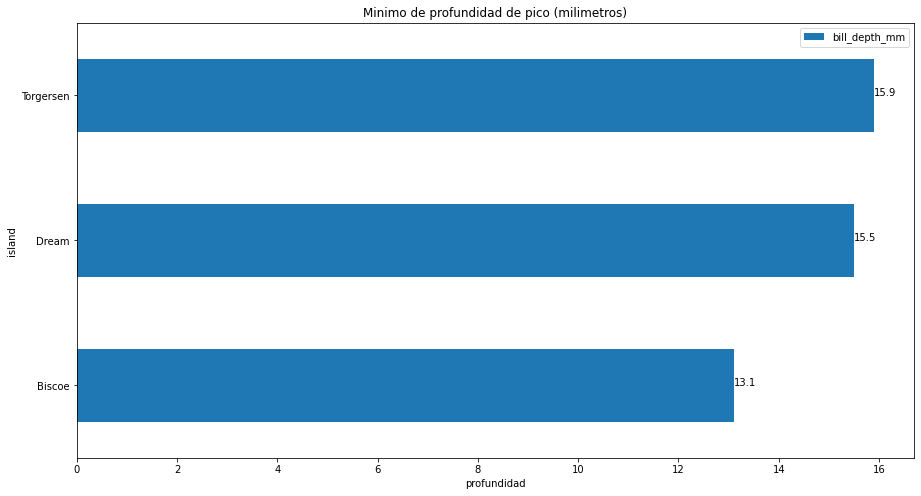

In [ ]:
island.plot(kind="barh",figsize=(15,8))
for index, value in enumerate(island.bill_depth_mm):
    plt.text(value, index, str(value))
plt.title("Minimo de profundidad de pico (milimetros)")
plt.xlabel("profundidad")
plt.ylabel('island')
plt.show()

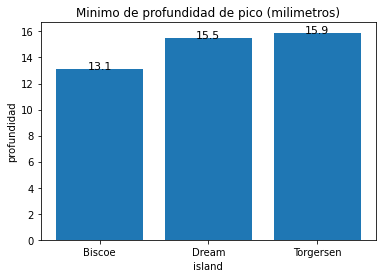

In [ ]:
plt.bar(island.index, island["bill_depth_mm"])
for index, value in enumerate(island.bill_depth_mm):
    plt.text(index, value, str(value), ha='center',fontsize=11)
plt.title("Minimo de profundidad de pico (milimetros)")
plt.xlabel("island")
plt.ylabel('profundidad')
plt.show()

3. Repite tu grafica anterior, pero cambia la opcion dentro de `plt.barh()` que te genere barras de color verde.

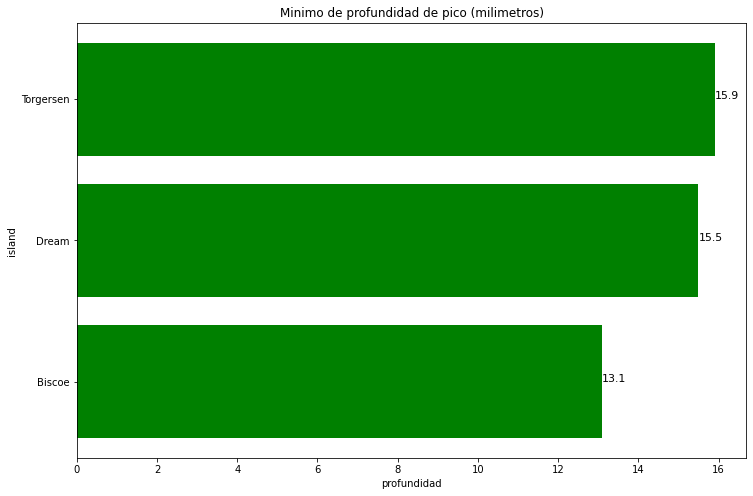

In [ ]:
plt.figure(figsize=(12,8))
plt.barh(island.index, island["bill_depth_mm"],color = 'green')
for index, value in enumerate(island.bill_depth_mm):
    plt.text(value, index, str(value),fontsize=11)
plt.title("Minimo de profundidad de pico (milimetros)")
plt.ylabel("island")
plt.xlabel('profundidad')
plt.show()

4. Crea una tabla agrupada segun `species` e `island`, y calcula el promedio de `bill_length_mm` para cada combinacion (ignorando valores nulos). Grafica esos valores. Incluye un titulo adecuado.

In [ ]:
combinado = data.groupby(["island","species"])[["bill_length_mm"]].mean()
combinado

bill_length_mm
island    species                  
Biscoe    Adelie          38.975000
          Gentoo          47.504878
Dream     Adelie          38.501786
          Chinstrap       48.833824
Torgersen Adelie          38.950980

In [ ]:
Biscoe = combinado.loc["Biscoe"]
Biscoe
# combinado.groupby(["island","species"])[["bill_length_mm"]].mean()

,bill_length_mm
species,
Adelie,38.975000
Gentoo,47.504878


In [ ]:
Dream = combinado.loc["Dream"]
Dream

,bill_length_mm
species,
Adelie,38.501786
Chinstrap,48.833824


In [ ]:
Torgersen = combinado.loc["Torgersen"]
Torgersen

,bill_length_mm
species,
Adelie,38.95098


In [ ]:
combinado1 = combinado.reset_index()
combinado1

,island,species,bill_length_mm
0,Biscoe,Adelie,38.975000
1,Biscoe,Gentoo,47.504878
2,Dream,Adelie,38.501786
3,Dream,Chinstrap,48.833824
4,Torgersen,Adelie,38.950980


In [ ]:
newf = combinado1.pivot(index='island', columns='species')
newf

bill_length_mm                      
species           Adelie  Chinstrap     Gentoo
island                                        
Biscoe         38.975000        NaN  47.504878
Dream          38.501786  48.833824        NaN
Torgersen      38.950980        NaN        NaN

In [ ]:
newf.columns[0][1]

'Adelie'

In [ ]:
for col in newf.bill_length_mm:
  print(col)

Adelie
Chinstrap
Gentoo


In [ ]:
island.bill_depth_mm

island
Biscoe       13.1
Dream        15.5
Torgersen    15.9
Name: bill_depth_mm, dtype: float64

In [ ]:
newf.bill_length_mm

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,38.975000,NaN,47.504878
Dream,38.501786,48.833824,NaN
Torgersen,38.950980,NaN,NaN


In [ ]:
newf.bill_length_mm.Adelie

island
Biscoe       38.975000
Dream        38.501786
Torgersen    38.950980
Name: Adelie, dtype: float64

Text(0.5, 1.0, 'promedio de especies en islas')

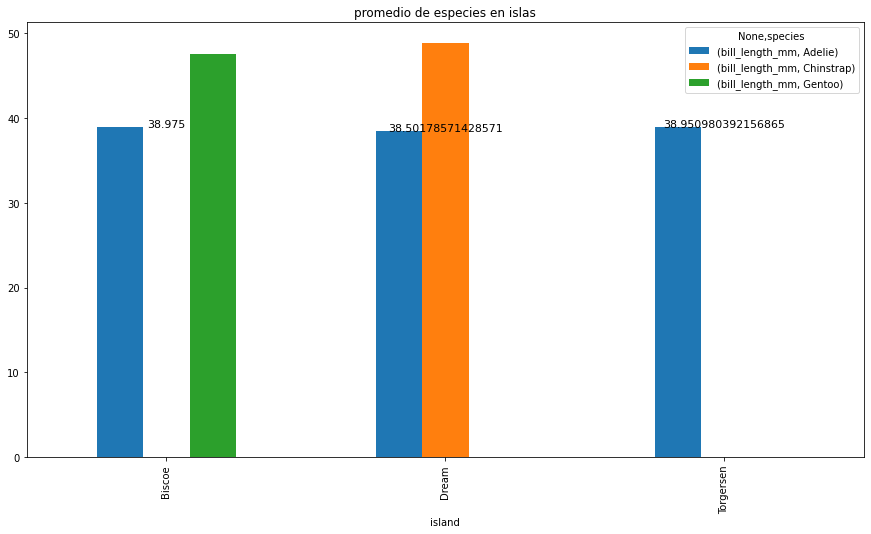

In [ ]:
newf.plot(kind="bar",figsize=(15,8))
for index, value in enumerate(newf.bill_length_mm.Adelie):
    plt.text(index, value, str(value), ha='center',fontsize=11)
plt.title("promedio de especies en islas")

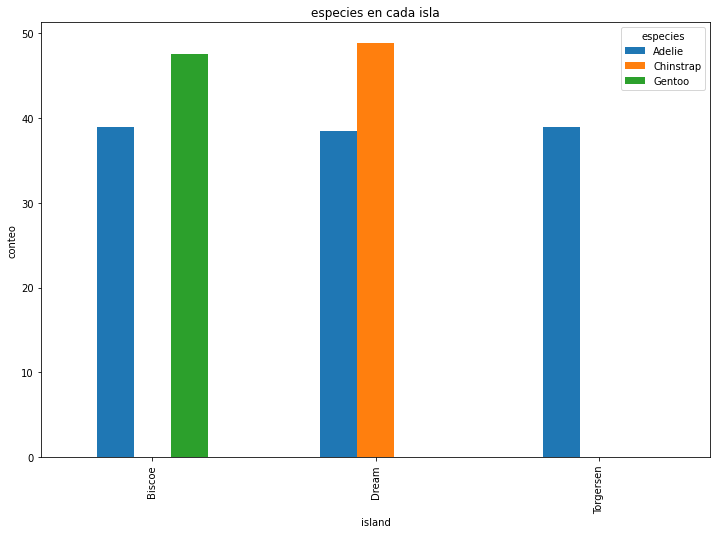

In [ ]:
combinado.unstack().plot(kind='bar',title='especies en cada isla',ylabel="conteo",figsize=(12,8))
plt.legend([newf.columns[0][1], newf.columns[1][1],newf.columns[2][1]],title="especies")


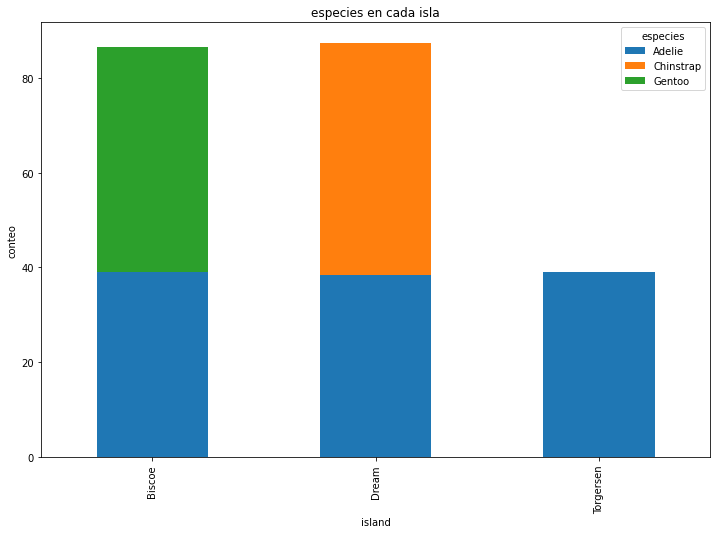

In [ ]:
combinado.unstack().plot(kind='bar', stacked=True, title='especies en cada isla',ylabel="conteo",figsize=(12,8))
plt.legend([newf.columns[0][1], newf.columns[1][1],newf.columns[2][1]],title="especies")


5. Repite la grafica anterior. Investiga como agregar _Grid lines_ y agrega unas a tu grafica. Los parametros que uses son a tu eleccion.

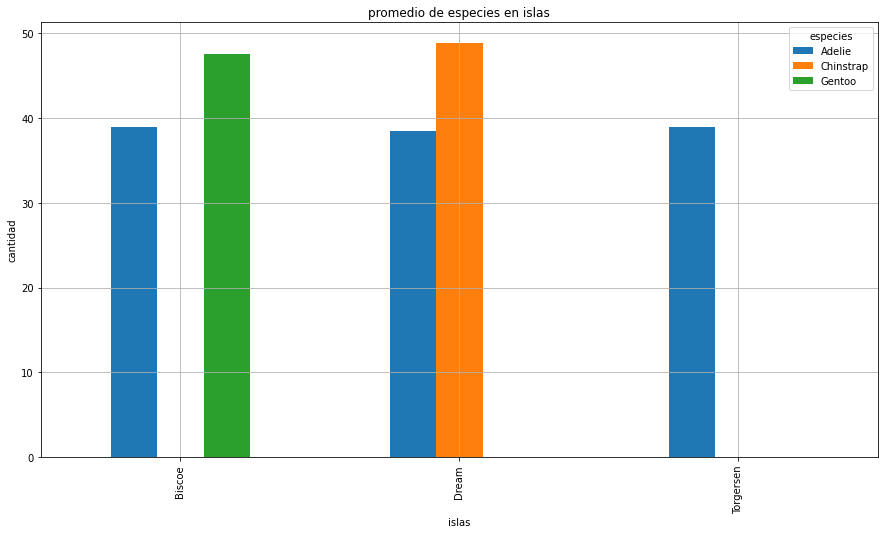

In [ ]:
newf.plot(kind="bar",figsize=(15,8))
plt.title("promedio de especies en islas")
plt.xlabel("islas")
plt.ylabel("cantidad")
plt.legend([newf.columns[0][1], newf.columns[1][1],newf.columns[2][1]],title="especies")
plt.grid()
plt.show()